Activity 2.2
The parking dataset (https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#
describes the car parking availability for different car parks in Birmingham city center, in the winter of 2016.
Birmingham city council wants you to build a model to predict the parking spaces available for the holiday season this year,
using a machine learning model.

Download and import the dataset into Colab
Graph the number of parking spaces available in the Bull Ring carpark over time.
Build multiple regression models for the above data, performing a train-test-split to show you model's efficacy. Which model was the strongest?
This data was only for a short period of time in winter - can you think of how this model could be extended to all year round?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [11]:
data = pd.read_csv("Bull_Ring_Car_Park.csv")

In [12]:
data.head() #Start 4th October 2016

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,Bull Ring,3053,215,04/10/2016 07:59
1,Bull Ring,3053,215,04/10/2016 07:59
2,Bull Ring,3053,260,04/10/2016 08:25
3,Bull Ring,3053,356,04/10/2016 08:59
4,Bull Ring,3053,436,04/10/2016 09:32


In [13]:
data.tail() #We find seasonal shopping week 19th December 2016

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
1181,Bull Ring,3053,2832,19/12/2016 14:30
1182,Bull Ring,3053,2738,19/12/2016 15:03
1183,Bull Ring,3053,2611,19/12/2016 15:29
1184,Bull Ring,3053,2368,19/12/2016 16:03
1185,Bull Ring,3053,2174,19/12/2016 16:30


In [14]:
data.info() #No missing items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  1186 non-null   object
 1   Capacity          1186 non-null   int64 
 2   Occupancy         1186 non-null   int64 
 3   LastUpdated       1186 non-null   object
dtypes: int64(2), object(2)
memory usage: 37.2+ KB


Initial findings on review of dataset given for car parking in Birmingham UK (I will call car park, blocks of data)
Unequal number of timestamps, many more in some car parks than others
Count intervals suggest manual counting, no in out count information
Start date was a Friday, Collection stopped 19th December 2016, but two blocks have different start end dates
Are there residents or cars left in the car park overnight?
We have blocks were they park more cars than rated capacity?
All appear to open seven days a week
Monitoring time 7:55 to 16:35 i.e., 8 hours forty minutes
“Others” would suggest aggregation, “Shopping” what’s this?
Initial low period in October, then the seasonal shopping season, finished collect 19th December 2016
Normally the Christmas shopping has a rush in early November with a lull and another sprint coming up to Christmas

Proceed with modelling
Due to inconsisencies between blocks, I will select a reasonable, Bull Ring block to build model first. the closest it comes to running out of space is 221. It has the most common start-end date. Research on the internet suggests the use of an ARIMA model, which can be found on statmodeles.

So we are interested in date-time (LastUpdated) and Occupancy and maybe Capacity later, lets plot LastUpdated v Occupancy
Right, a lot of information with a very distinctive jump, so early November? The client has given us this dataset so we will stick with the full time frame, if later we think we need to just use the busy time, lets deal with it then
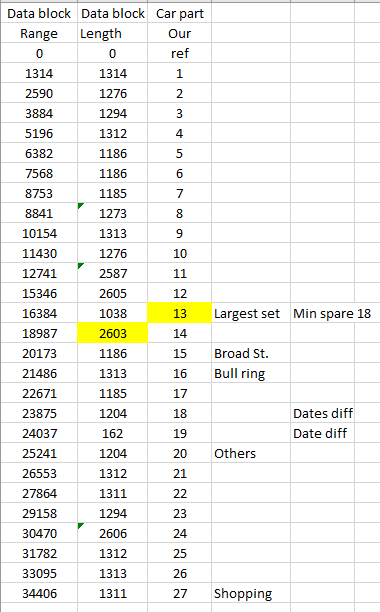

In [15]:
X = data["LastUpdated"]
Y = data["Occupancy"]

In [16]:
#We can manually turn the plot on as required to save processing time
#fig, ax = plt.subplots( figsize=(20, 16))
#line1 = ax.scatter(X,Y, label='Parking', color = "black", lw=0.01,ls='solid')
#plt.show()
#Issue with plot coming out in reverse order

In [17]:
#When making the test data we must have the jump included to Train and Test data set, 65;35 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=200)

Plot both sets to indicate how it delt with jump, I was trying to capture the low period in October into the model so used 65/35

In [18]:
#We can manually turn the plot on as required to save processing time
#fig, ax = plt.subplots( figsize=(20, 16))
#line1 = ax.scatter(X_test,Y_test, label='Parking', color = "black", lw=0.01,ls='solid')
#plt.show()
#Issue with plot coming out in reverse order

In [19]:
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
import requests


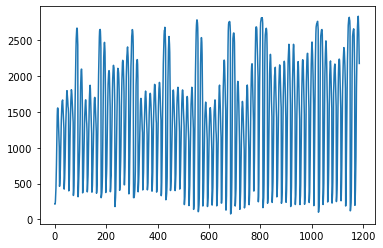

In [20]:
# Set the frequency
data.index.freq="LastUpdated"
parking = data['Occupancy']
fig, ax = plt.subplots()
ax = parking.plot(ax=ax)
#Plot graf to indicat seasonality

In [21]:
#Because we have seasonal data I will use  SARIMAX

In [22]:
# Set the frequency
X_train.index.freq=X_train

In [23]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Y_train, trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

C:\Users\decla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\decla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:              Occupancy   No. Observations:                  770
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6194.159
Date:                Mon, 14 Jun 2021   AIC                          12396.318
Time:                        21:05:12   BIC                          12414.899
Sample:                             0   HQIC                         12403.469
                                - 770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1272      0.124     -1.030      0.303      -0.369       0.115
ar.L1         -0.0089      0.037     -0.244      0.807      -0.081       0.063
ma.L1         -1.0000      0.075    -13.261      0.0

Confession time, I struggled to find any useful information on the internet to help me undertand the output above So I need to do more research.

In [26]:
data2 = pd.read_csv("Bull_Ring_Car_Park_code.csv") #I have coded the dates as numbers, but I need to review
Xx = np.array(data2.iloc[:,3]).reshape(-1,1) #Reshape for SVR
Yy = data2["Occupancy"]

LastUpdated


In [25]:
#When making the test data we must have the jump included to Train and Test data set, 65;35 split
Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(Xx, Yy, test_size=0.35, random_state=200)

ValueError: Found input variables with inconsistent numbers of samples: [11, 1186]

In [ ]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [ ]:
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
   
    
    axes[ix].plot(Xx, svr.fit(Xx, Yy).predict(Xx), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    axes[ix].scatter(Xx[svr.support_], Yy[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(Xx[np.setdiff1d(np.arange(len(Xx)), svr.support_)],
                     Yy[np.setdiff1d(np.arange(len(Xx)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

What next? Why does the plot print in reverse order? Understand the dataset better, what is the block “shopping”? “othersxxxxs”, where are these car parks? are the main parks in the centre of the city? are there Park and Rides, large travel terminus, train station? Decide what are the blocks, if real car parks, add more car parks to the model Are there tweaks that can be made to the ARIMA model?

In [ ]:
y_svr_predict = svr.fit(Xx, Yy).predict(Xx)

In [ ]:
r2_score(Xx_predict,Yy_svr_predict )
print(r2_score(Xx_predict, y_svr_predict,multioutput='variance_weighted'))

In [ ]:
r2_score(Xx[np.setdiff1d(np.arange(len(Xx)), svr.support_)],
                     Yy[np.setdiff1d(np.arange(len(Xx)), svr.support_)])
print(r2_score(Xx_predict, y_svr_predict,multioutput='variance_weighted'))